In [106]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [107]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [108]:
len(X_train)

60000

In [109]:
len(X_test)

10000

In [110]:
X_train.shape

(60000, 28, 28)

In [111]:
X_train = X_train /255
X_test = X_test /255

In [112]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

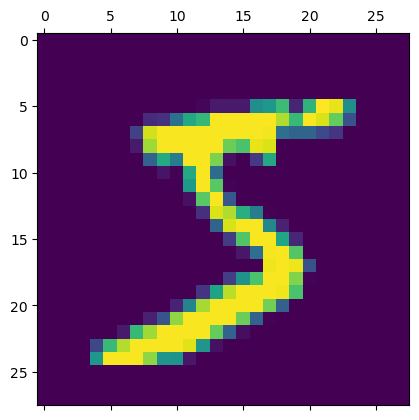

In [113]:
plt.matshow(X_train[0])

In [114]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [115]:
X_train.shape

(60000, 28, 28)

In [116]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [117]:
X_train_flattened.shape

(60000, 784)

In [118]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [119]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,), activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

In [122]:
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2494 - accuracy: 0.9312
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2480 - accuracy: 0.9315
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2466 - accuracy: 0.9320
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2450 - accuracy: 0.9323
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2438 - accuracy: 0.9331


In [123]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2660 - accuracy: 0.9259


[0.26600441336631775, 0.9258999824523926]

In [124]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [125]:
y_predicted[0]

array([8.0833549e-04, 2.4910105e-09, 5.9076794e-03, 9.7794545e-01,
       1.6260752e-03, 1.3639084e-01, 2.8113207e-09, 9.9988103e-01,
       5.6570921e-02, 6.5700930e-01], dtype=float32)

In [126]:
np.argmax(y_predicted[0])

7

In [127]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:6]

[7, 2, 1, 0, 4, 1]

In [128]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

Text(58.222222222222214, 0.5, 'Truth')

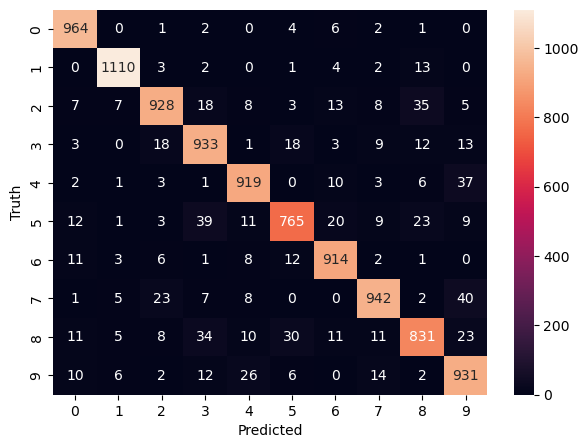

In [63]:
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [104]:
model = keras.Sequential([
    keras.layers.Dense(1000,input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(100, activation = 'sigmoid')
    
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

In [105]:
model.fit(X_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2017 - accuracy: 0.9403
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0781 - accuracy: 0.9766
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0491 - accuracy: 0.9846
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0358 - accuracy: 0.9885
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0264 - accuracy: 0.9914


In [83]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0737 - accuracy: 0.9798


[0.07369768619537354, 0.9797999858856201]

313/313 [==============================] - 1s 3ms/step


Text(58.222222222222214, 0.5, 'Truth')

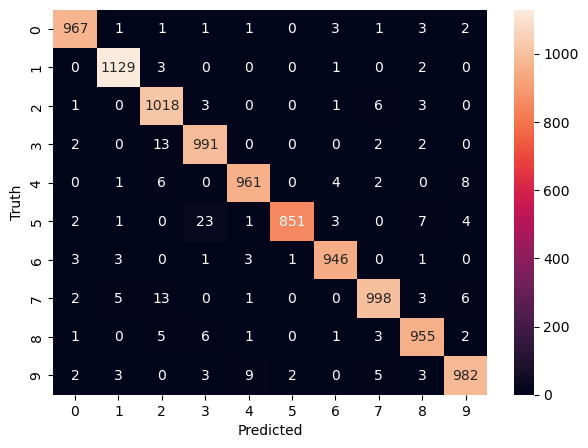

In [84]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:6]

cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')